# 1. Problema

Clasificar si una persona tiene obesidad según sus hábitos alimenticios y nivel de actividad física.

# 2. Set de datos después de la limpieza

La información recolectada se encuentra en un archivo CSV (`dataset_obesity_clean.csv`) con 2087 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ('Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I' Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III' que representan los niveles de obesidad). Las columnas son:

1. 'Gender'
2. 'Age'
3. 'Height'
4. 'Weight'
5. 'family_history_with_overweight'
6. 'FAVC'
7. 'FCVC'
8. 'NCP'
9. 'CAEC'
10. 'SMOKE'
11. 'CH2O'
12. 'SCC'
13. 'FAF'
14. 'TUE'
15. 'CALC'
16. 'MTRANS'
17. 'NObeyesdad'

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

# 3. Lectura del dataset

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta = '../1_data/dataset_obesity_clean.csv'
data = pd.read_csv(ruta, index_col=0)

In [3]:
print(data.shape)
data.head()

(2087, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



# 4. Análisis Exploratorio

## 4.1 Análisis de cada variable de manera individual

Nos permite entender las características generales de cada variable de nuestro set de datos.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

Columna Gender: ['Female' 'Male'] - 2 subniveles
Columna family_history_with_overweight: ['yes' 'no'] - 2 subniveles
Columna FAVC: ['no' 'yes'] - 2 subniveles
Columna CAEC: ['Sometimes' 'Frequently' 'Always' 'no'] - 4 subniveles
Columna SMOKE: ['no' 'yes'] - 2 subniveles
Columna SCC: ['no' 'yes'] - 2 subniveles
Columna CALC: ['no' 'Sometimes' 'Frequently' 'Always'] - 4 subniveles
Columna MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'] - 5 subniveles
Columna NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III'] - 7 subniveles


/var/folders/q7/h46b93yn785_qrccjg33gkqw0000gn/T/ipykernel_18960/1081789885.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/var/folders/q7/h46b93yn785_qrccjg33gkqw0000gn/T/ipykernel_18960/1081789885.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/var/folders/q7/h46b93yn785_qrccjg33gkqw0000gn/T/ipykernel_18960/1081789885.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/var/folders/q7/h46b93yn785_qrccjg33gkqw0000gn/T/ipykernel_18960/1081789885.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tic

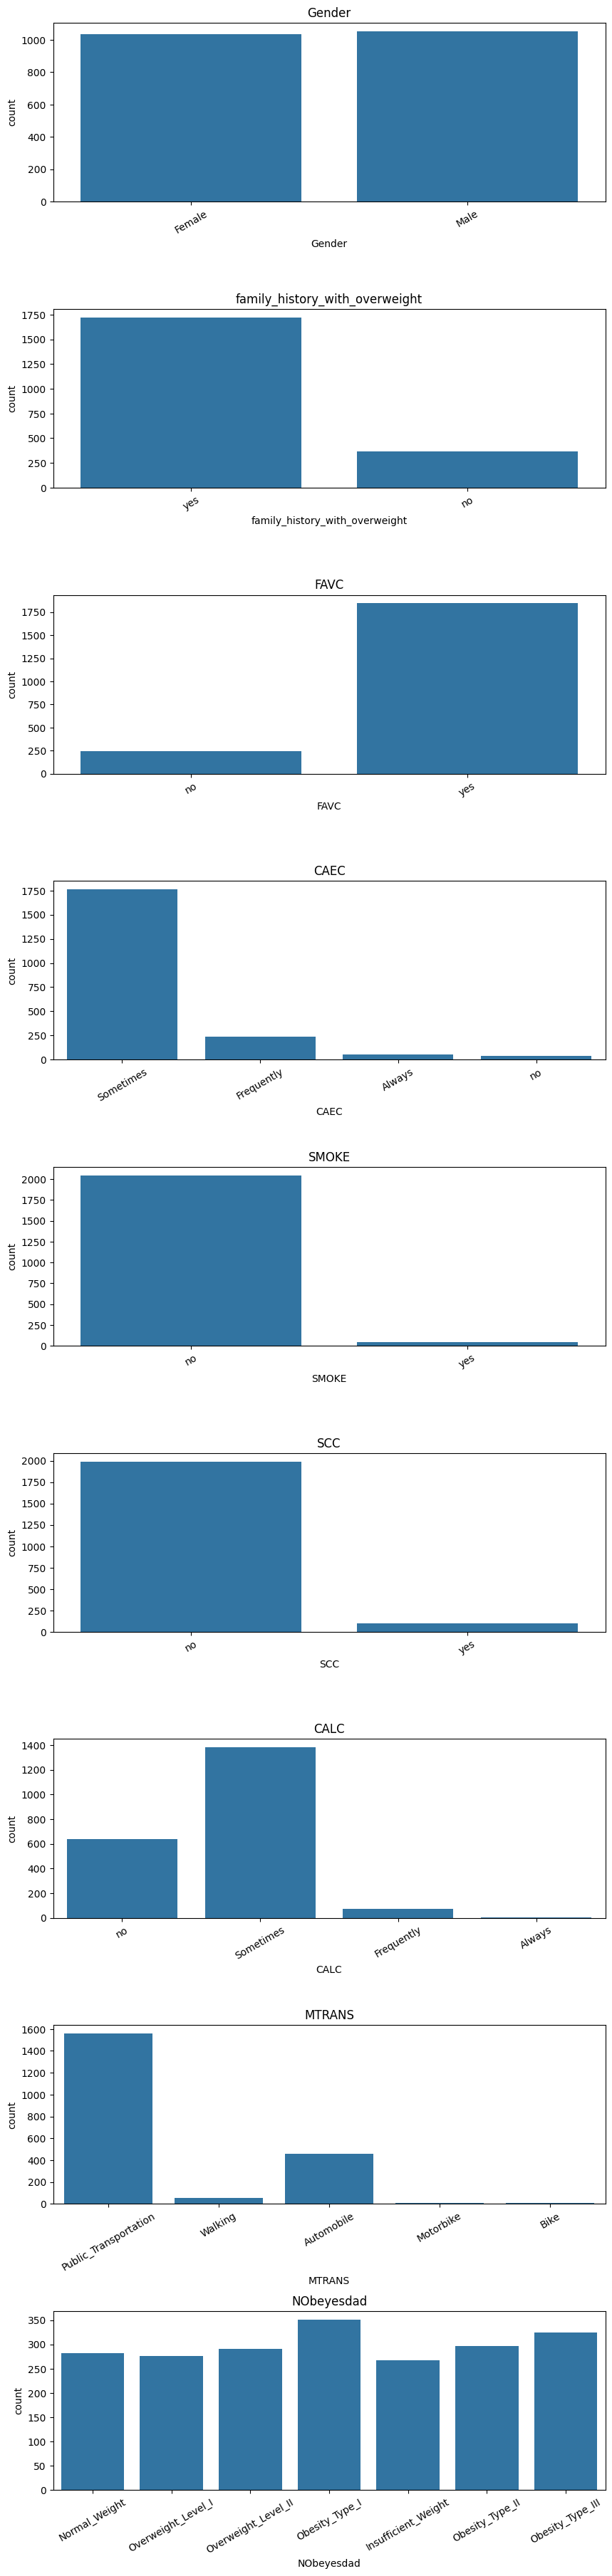

In [5]:
# Tomemos las variables categóricas y generemos gráficos de barras
col_cat = data.select_dtypes(include=['object']).columns

# Gráfico de Barras de Conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.6)
# fig.tight_layout()

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
    
    print(f'Columna {col}: {data[col].unique()} - {data[col].nunique()} subniveles')

In [6]:
data.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [7]:
# Identificar columnas categóricas (excluyendo la variable objetivo)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols.remove('NObeyesdad')

# Aplicar One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, dummy_na=False)

# Data ya codificada
data_processed = data_encoded

# Verificar valores nulos
missing_values = data_processed.isnull().sum()
print("Missing values after one-hot encoding:\n", missing_values)

# Mostrar primeros datos
display(data_processed.head())

Missing values after one-hot encoding:
 Age                                   0
Height                                0
Weight                                0
FCVC                                  0
NCP                                   0
CH2O                                  0
FAF                                   0
TUE                                   0
NObeyesdad                            0
Gender_Female                         0
Gender_Male                           0
family_history_with_overweight_no     0
family_history_with_overweight_yes    0
FAVC_no                               0
FAVC_yes                              0
CAEC_Always                           0
CAEC_Frequently                       0
CAEC_Sometimes                        0
CAEC_no                               0
SMOKE_no                              0
SMOKE_yes                             0
SCC_no                                0
SCC_yes                               0
CALC_Always                           0


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,True,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,True,...,True,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,False,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,False,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,False,...,False,False,False,True,False,False,False,False,True,False


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Crear la variable BMI
data_processed['BMI'] = data_processed['Weight'] / (data_processed['Height'] ** 2)

# Separar variables predictoras y objetivo
X = data_processed.drop(columns=['NObeyesdad'])
y = data_processed['NObeyesdad']

# Split inicial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Importancia de características
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
display(importance_df.head(10))

,feature,importance
31,BMI,0.323169
2,Weight,0.179640
0,Age,0.057949
3,FCVC,0.057595
1,Height,0.051101
8,Gender_Female,0.038305
4,NCP,0.036130
9,Gender_Male,0.031118
7,TUE,0.027389
5,CH2O,0.025054


In [9]:
# Nuevas características
data_processed['Weight_Age_Ratio'] = data_processed['Weight'] / data_processed['Age']
data_processed['FAF_TUE_Interaction'] = data_processed['FAF'] * data_processed['TUE']

In [10]:
X_new = data_processed.drop(columns=['NObeyesdad'])
y_new = data_processed['NObeyesdad']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

rf_model_new = RandomForestClassifier(random_state=42)
rf_model_new.fit(X_train_new, y_train_new)

importances_new = rf_model_new.feature_importances_
feature_names_new = X_train_new.columns
importance_df_new = pd.DataFrame({'feature': feature_names_new, 'importance': importances_new}).sort_values(by='importance', ascending=False)
display(importance_df_new.head(10))

,feature,importance
31,BMI,0.290602
2,Weight,0.183296
32,Weight_Age_Ratio,0.073582
0,Age,0.055343
3,FCVC,0.046314
1,Height,0.044804
8,Gender_Female,0.034102
9,Gender_Male,0.032065
4,NCP,0.029936
5,CH2O,0.022443


In [11]:
X = data_processed.drop(columns=['NObeyesdad'])
y = data_processed['NObeyesdad']

# Train y temporal
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Validación y Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=84, stratify=y_temp)

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI', 'Weight_Age_Ratio', 'FAF_TUE_Interaction']
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_val_scaled = scaler.transform(X_val[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)
y_test_encoded = encoder.transform(y_test)

# Combinar
train_df = pd.DataFrame(X_train_scaled, columns=numerical_cols)
train_df['NObeyesdad'] = y_train_encoded

val_df = pd.DataFrame(X_val_scaled, columns=numerical_cols)
val_df['NObeyesdad'] = y_val_encoded

test_df = pd.DataFrame(X_test_scaled, columns=numerical_cols)
test_df['NObeyesdad'] = y_test_encoded

Training Random Forest...
Random Forest results on validation set:
Accuracy: 0.9856
Precision: 0.9864
Recall: 0.9856
F1-Score: 0.9856
Confusion Matrix:


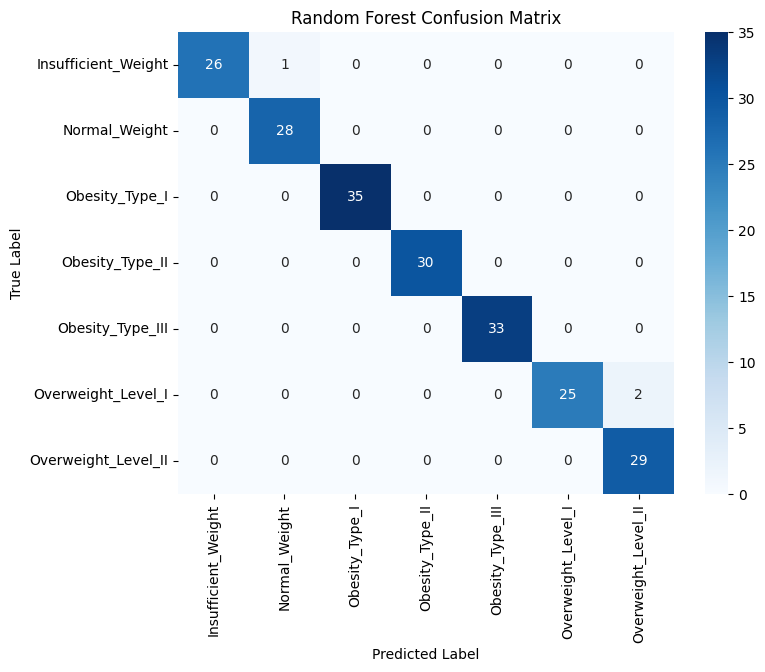

--------------------
Training Logistic Regression...
Logistic Regression results on validation set:
Accuracy: 0.9234
Precision: 0.9275
Recall: 0.9234
F1-Score: 0.9231
Confusion Matrix:


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


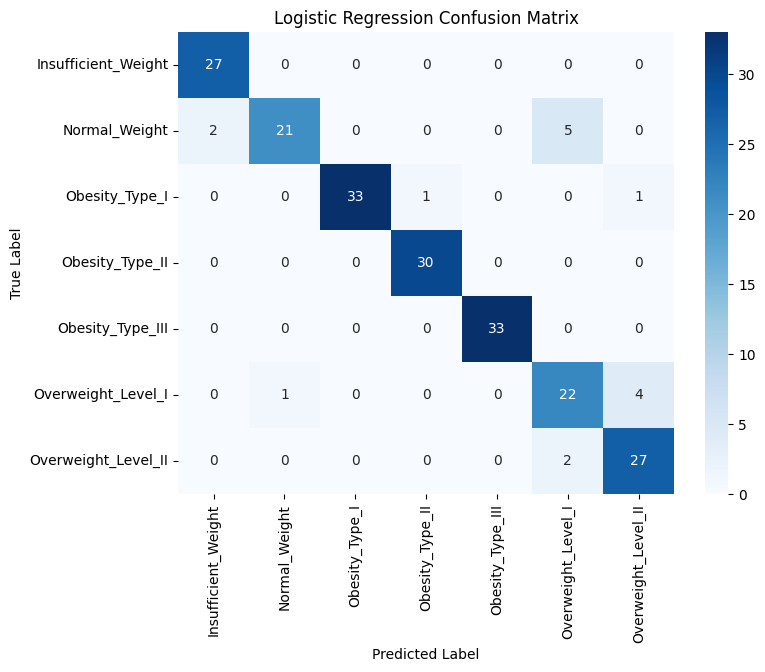

--------------------
Training SVM...
SVM results on validation set:
Accuracy: 0.9522
Precision: 0.9538
Recall: 0.9522
F1-Score: 0.9512
Confusion Matrix:


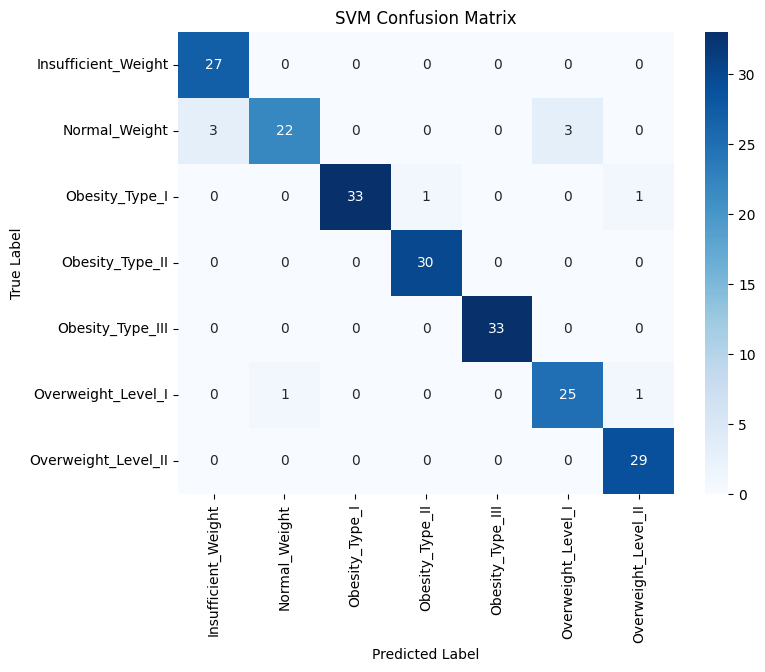

--------------------


,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
Random Forest,0.985646,0.986428,0.985646,0.985618,"[[26, 1, 0, 0, 0, 0, 0], [0, 28, 0, 0, 0, 0, 0..."
Logistic Regression,0.923445,0.927507,0.923445,0.923067,"[[27, 0, 0, 0, 0, 0, 0], [2, 21, 0, 0, 0, 5, 0..."
SVM,0.952153,0.953833,0.952153,0.951165,"[[27, 0, 0, 0, 0, 0, 0], [3, 22, 0, 0, 0, 3, 0..."


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42),
    "SVM": SVC(random_state=42),
}

results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(train_df.drop(columns=['NObeyesdad']), train_df['NObeyesdad'])
    y_pred_val = model.predict(val_df.drop(columns=['NObeyesdad']))

    results[model_name] = {
        "Accuracy": accuracy_score(val_df['NObeyesdad'], y_pred_val),
        "Precision": precision_score(val_df['NObeyesdad'], y_pred_val, average='weighted'),
        "Recall": recall_score(val_df['NObeyesdad'], y_pred_val, average='weighted'),
        "F1-Score": f1_score(val_df['NObeyesdad'], y_pred_val, average='weighted'),
        "Confusion Matrix": confusion_matrix(val_df['NObeyesdad'], y_pred_val),
    }

    print(f"{model_name} results on validation set:")
    for metric, value in results[model_name].items():
        if metric == "Confusion Matrix":
            print(f"{metric}:")
        else:
            print(f"{metric}: {value:.4f}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(results[model_name]["Confusion Matrix"], annot=True, fmt="d", cmap="Blues",
                xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    print("-" * 20)

results_df = pd.DataFrame(results).T
display(results_df)

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(train_df.drop(columns=['NObeyesdad']), train_df['NObeyesdad'])

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Random Forest hyperparameters: {best_params}")
print(f"Best Random Forest accuracy on validation set: {grid_search.best_score_:.4f}")

Best Random Forest hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest accuracy on validation set: 0.9880


In [15]:
y_pred_test = best_rf_model.predict(test_df.drop(columns=['NObeyesdad']))
test_accuracy = accuracy_score(test_df['NObeyesdad'], y_pred_test)
print(f"Best Random Forest accuracy on test set: {test_accuracy:.4f}")

Best Random Forest accuracy on test set: 0.9904
